In [3]:
#Dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
pd.options.mode.chained_assignment = None  # default='warn'




In [4]:
url = "https://www.fantasyfootballdatapros.com/api/players/"
years = list(range(2010, 2020))

player_name = []
position = []
season = []
games_played = []
fumbles = []
interceptions = []
passing_yds = []
receptions = []
receiving_yds = []
rushing_yds = []
passing_tds = []
rushing_tds = []
receiving_tds = []
team = []

#fantasy = requests.get(url + '2019/all').json()
#print(json.dumps(fantasy, indent=4, sort_keys=True))

for year in years:
    query_url = url + str(year) + '/all'
    fantasy = requests.get(query_url).json()
    number_of_players = len(fantasy)
    
    for x in range(number_of_players):
        player_name.append(fantasy[x]['player_name'])
        team.append(fantasy[x]['team'])
        position.append(fantasy[x]['position'])
        season.append(year)
        games_played.append(fantasy[x]['games_played'])
        fumbles.append(fantasy[x]['fumbles_lost'])
        interceptions.append(fantasy[x]['stats']['passing']['int'])
        passing_yds.append(fantasy[x]['stats']['passing']['passing_yds'])
        passing_tds.append(fantasy[x]['stats']['passing']['passing_td'])
        rushing_yds.append(fantasy[x]['stats']['rushing']['rushing_yds'])
        rushing_tds.append(fantasy[x]['stats']['rushing']['rushing_td'])
        receptions.append(fantasy[x]['stats']['receiving']['receptions'])
        receiving_yds.append(fantasy[x]['stats']['receiving']['receiving_yds'])
        receiving_tds.append(fantasy[x]['stats']['receiving']['receiving_td'])
    
player_dict = {
    'Player Name' : player_name,
    'Team': team,
    'Position': position,
    'Season': season,
    'Games Played': games_played,
    'Fumbles': fumbles,
    'Interceptions': interceptions,
    'Passing Yards': passing_yds,
    'Passing TDs':passing_tds,
    'Rushing Yards':rushing_yds,
    'Rushing TDs':rushing_tds,
    'Receptions':receptions,
    'Receiving Yards':receiving_yds,
    'Receiving TDs':receiving_tds
}
    
players = pd.DataFrame(player_dict)


#Calculating Season point totals
players['Half PPR Points Season Total'] = (
    (players['Passing Yards']*0.04) + (players['Passing TDs'] * 4) - (players['Interceptions'] * 2)+
    (players['Rushing Yards']*.1) + (players['Rushing TDs'] * 6) - (players['Fumbles'] * 2) + 
    (players['Receptions'] * 0.5) + (players['Receiving Yards'] * .1) + (players['Receiving TDs'] * 6)
    )






In [5]:
#Breaking up dataframe into smaller dataframes of individual positions
qb_data = players[players['Position'] == 'QB']
rb_data = players[players['Position'] == 'RB']
wr_data = players[players['Position'] == 'WR']
te_data = players[players['Position'] == 'TE']

#list of position dataframes for for loops below
data_list = [qb_data, rb_data, wr_data, te_data]


#Dictionaries that will be used to store total points for top ranked players at each position over the years
qb_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
}

rb_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
    13 : 0,
    14 : 0,
    15 : 0,
    16 : 0,
    17 : 0, 
    18 : 0,
    19 : 0,
    20 : 0,
    21 : 0,
    22 : 0,
    23 : 0,
    24 : 0   
}

wr_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,
    13 : 0,
    14 : 0,
    15 : 0,
    16 : 0,
    17 : 0, 
    18 : 0,
    19 : 0,
    20 : 0,
    21 : 0,
    22 : 0,
    23 : 0,
    24 : 0
    
}

te_rank_points = {
    1 : 0,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 0,
    7 : 0,
    8 : 0,
    9 : 0,
    10 : 0,
    11 : 0,
    12 : 0,  
}

#list of dictionaries to be used in for loop
positions = [qb_rank_points, rb_rank_points, wr_rank_points, te_rank_points]

#for loop that will go through every year, then go through qb, rb, wr, and te to
#sort by the most total season points scored

for year in years:
    for x in range(4):
        temp_df = data_list[x][data_list[x]['Season'] == year]
        temp_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
        temp_df.reset_index(inplace = True, drop = True)
        
#This section below takes the number 1-12 or 1-24 of each position for every year and sums 
# all the number 1 ranked scores, the number 2 ranked scores, etc., leaving the totals in the
# dictionaries created earlier

        for y in range(1, 25):
            if y in positions[x]:
                positions[x][y] += temp_df._get_value(y - 1, 'Half PPR Points Season Total')

#This for loop takes the total sum of each rank and averages it, dividing by 10 because there are 10 years of data

for x in range(4):
    for y in range(1, 25):
        if y in positions[x]:
            positions[x][y] = positions[x][y] / 10
            



[-0.03287111  5.89966064]


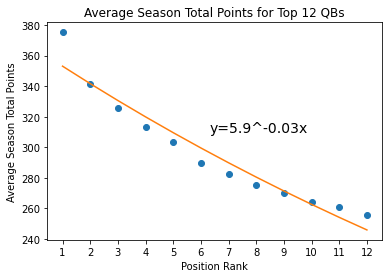

In [6]:
qb_ranks = pd.DataFrame(qb_rank_points, index=[0])

qb_ranks = qb_ranks.transpose()
qb_ranks

#Since our data looked exponential I tried my best to apply an exponential fit line for the top 12 Qbs
y_data = np.array(qb_ranks[0].tolist())
x_data = np.array([range(1,13)])

#converting x and y arrays to 1-dimensional arrays
x_data = x_data[0,:]
log_x = np.log(x_data)
log_y = np.log(y_data)

#the 'fit' values are the parameters we will use in our exponential equaltion: y = A^(Bx)
fit = np.polyfit(x_data, log_y, 1, w=np.sqrt(y_data))
print(fit)
y = np.exp(fit[1]) * np.exp(fit[0]*x_data) # exponential equation to add to plot (similar to line equation in linear regression)
plt.plot(x_data, y_data, "o")  #Base Plot
plt.plot(x_data, y) #Plot of Exponential fit line
plt.ylabel('Average Season Total Points')
plt.xlabel('Position Rank')
plt.title('Average Season Total Points for Top 12 QBs')
plt.xticks(np.arange(1, 13, step=1))

#Rounding fit parameteres so they print nicely on the plot
fit_0 = round(fit[0], 2)
fit_1 = round(fit[1], 2)

#equation for the fit line that prints on plot
fit_equation = f'y={fit_1}^{fit_0}x'
plt.gcf().text(0.5, 0.5, fit_equation, fontsize=14)
plt.savefig("/users/tannerpedretti/Desktop/project_one/QB_with_regression.png")

[-0.03277107  5.72593552]


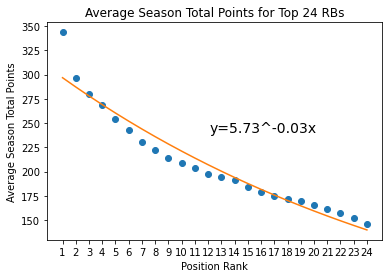

<Figure size 432x288 with 0 Axes>

In [7]:
rb_ranks = pd.DataFrame(rb_rank_points, index=[0])

rb_ranks = rb_ranks.transpose()
rb_ranks

#Since our data looked exponential I tried my best to apply an exponential fit line for the top 24 running backs
y_data = np.array(rb_ranks[0].tolist())
x_data = np.array([range(1,25)])

#converting x and y arrays to 1-dimensional arrays
x_data = x_data[0,:]
log_x = np.log(x_data)
log_y = np.log(y_data)

#the 'fit' values are the parameters we will use in our exponential equaltion: y = A^Bx
fit = np.polyfit(x_data, log_y, 1, w=np.sqrt(y_data))
print(fit)
y = np.exp(fit[1]) * np.exp(fit[0]*x_data) # exponential equation to add to plot (similar to line equation in linear regression)
plt.plot(x_data, y_data, "o")  #Base Plot
plt.plot(x_data, y) #Plot of Exponential fit line
plt.ylabel('Average Season Total Points')
plt.xlabel('Position Rank')
plt.title('Average Season Total Points for Top 24 RBs')
plt.xticks(np.arange(1, 25, step=1))

#Rounding fit parameteres so they print nicely on the plot
fit_0 = round(fit[0], 2)
fit_1 = round(fit[1], 2)

#equation for the fit line that prints on plot
fit_equation = f'y={fit_1}^{fit_0}x'
plt.gcf().text(0.5, 0.5, fit_equation, fontsize=14)
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/project_one/RB_with_regression.png")


[-0.02264973  5.60905015]


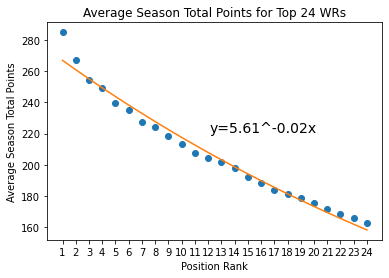

In [8]:
wr_ranks = pd.DataFrame(wr_rank_points, index=[0])

wr_ranks = wr_ranks.transpose()
wr_ranks

#Since our data looked exponential I tried my best to apply an exponential fit line for the top 24 WRS
y_data = np.array(wr_ranks[0].tolist())
x_data = np.array([range(1,25)])

#converting x and y arrays to 1-dimensional arrays
x_data = x_data[0,:]
log_x = np.log(x_data)
log_y = np.log(y_data)

#the 'fit' values are the parameters we will use in our exponential equaltion: y = A^(Bx)
fit = np.polyfit(x_data, log_y, 1, w=np.sqrt(y_data))
print(fit)
y = np.exp(fit[1]) * np.exp(fit[0]*x_data) # exponential equation to add to plot (similar to line equation in linear regression)
plt.plot(x_data, y_data, "o")  #Base Plot
plt.plot(x_data, y) #Plot of Exponential fit line
plt.ylabel('Average Season Total Points')
plt.xlabel('Position Rank')
plt.title('Average Season Total Points for Top 24 WRs')
plt.xticks(np.arange(1, 25, step=1))

#Rounding fit parameteres so they print nicely on the plot
fit_0 = round(fit[0], 2)
fit_1 = round(fit[1], 2)

#equation for the fit line that prints on plot
fit_equation = f'y={fit_1}^{fit_0}x'
plt.gcf().text(0.5, 0.5, fit_equation, fontsize=14)
plt.savefig("/users/tannerpedretti/Desktop/project_one/WR_with_regression.png")


[-0.05411608  5.36740439]


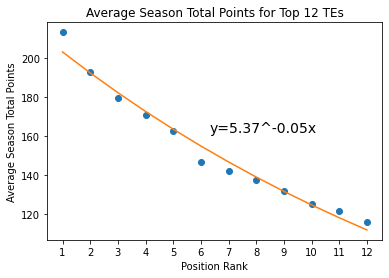

<Figure size 432x288 with 0 Axes>

In [9]:
te_ranks = pd.DataFrame(te_rank_points, index=[0])

te_ranks = te_ranks.transpose()
te_ranks
#Since our data looked exponential I tried my best to apply an exponential fit line for the top 24 TEs
y_data = np.array(te_ranks[0].tolist())
x_data = np.array([range(1,13)])

#converting x and y arrays to 1-dimensional arrays
x_data = x_data[0,:]
log_x = np.log(x_data)
log_y = np.log(y_data)

#the 'fit' values are the parameters we will use in our exponential equaltion: y = A^(Bx)
fit = np.polyfit(x_data, log_y, 1, w=np.sqrt(y_data))
print(fit)
y = np.exp(fit[1]) * np.exp(fit[0]*x_data) # exponential equation to add to plot (similar to line equation in linear regression)
plt.plot(x_data, y_data, "o")  #Base Plot
plt.plot(x_data, y) #Plot of Exponential fit line
plt.ylabel('Average Season Total Points')
plt.xlabel('Position Rank')
plt.title('Average Season Total Points for Top 12 TEs')
plt.xticks(np.arange(1, 13, step=1))

#Rounding fit parameteres so they print nicely on the plot
fit_0 = round(fit[0], 2)
fit_1 = round(fit[1], 2)

#equation for the fit line that prints on plot
fit_equation = f'y={fit_1}^{fit_0}x'
plt.gcf().text(0.5, 0.5, fit_equation, fontsize=14)
plt.show()
plt.savefig("/users/tannerpedretti/Desktop/project_one/TE_with_regression.png")

In [10]:
#Rookie Lists 
#(pull these names from the data frame above 
#by each year and compare to the minimum highest startable score for each position
#QB/TE > 12 , RB/WR > 24

#QB 
qb2019 = ["Kyler Murray", "Daniel Jones", "Dwayne Haskins", "Drew Lock", "Will Grier"]
qb2018 = ["Baker Mayfield", "Sam Darnold", "Josh Allen", "Josh Rosen", "Lamar Jackson"]
qb2017 = ["Mitchell Trubisky", "Patrick Mahomes", "Deshaun Watson", "DeShone Kizer", "Davis Webb"]
qb2016 = ["Jared Goff", "Carson Wentz", "Paxton Lynch", "Christian Hackenberg", "Jacoby Brissett"]
qb2015 = ["Jameis Winston", "Marcus Mariota", "Garrett Grayson", "Sean Mannion", "Bryce Petty"]

#RB
rb2019 = ["Josh Jacobs", "Miles Sanders", "Darrell Henderson", "David Montgomery", "Devin Singletary"]
rb2018 = ["Saquon Barkley", "Rashaad Penny", "Sony Michel", "Nick Chubb", "Ronald Jones"]
rb2017 = ['Leonard Fournette', 'Christian McCaffrey', 'Dalvin Cook', 'Joe Mixon', 'Alvin Kamara']
rb2016 = ['Ezekiel Elliott', 'Derrick Henry', 'Kenyan Drake', 'C.J. Prosise', 'Tyler Ervin']
rb2015 = ['Todd Gurley', 'Melvin Gordon', 'T.J. Yeldon', 'Ameer Abdullah', 'Tevin Coleman']

#WR
wr2019 = ["Marquise Brown", "N'Keal Harry", "Deebo Samuel", "A.J. Brown", "	Mecole Hardman"]
wr2018 = ["D.J. Moore", "Calvin Ridley","Courtland Sutton", "Dante Pettis", "Christian Kirk"]
wr2017 = ["Corey Davis", "Mike Williams","John Ross", "Zay Jones", "Curtis Samuel"]
wr2016 = ["Corey Coleman", "Will Fuller", "Josh Doctson","Laquon Treadwell", "Sterling Shepard"]
wr2015 = ["Amari Cooper", "Kevin White", "DeVante Parker", "Nelson Agholor", "Breshad Perriman"]

#TE
te2019 = ["T.J. Hockenson", "Noah Fant", "Irv Smith Jr.", "Drew Sample", "Josh Oliver"]
te2018 = ["Hayden Hurst", "Mike Gesicki", "Dallas Goedert", "Mark Andrews", "Jordan Akins"]
te2017 = ["O.J. Howard", "Evan Engram", "David Njoku", "Gerald Everett", "Adam Shaheen"]
te2016 = ["Hunter Henry", "Austin Hooper", "Nick Vannett", "Tyler Higbee", "Seth Devalve"]
te2015 = ["Maxx Williams", "Clive Walford", "Tyler Kroft", "Jeff Heuerman", "Blake Bell"]

In [11]:
#sort dataset by top ten QB to see the players and  their points
qb_rookie = qb_data.sort_values(['Half PPR Points Season Total']).groupby(['Season']).tail(12)
qb_rookie.loc[qb_rookie['Season']==2019].sort_values(['Half PPR Points Season Total'], ascending=False)

,Player Name,Team,Position,Season,Games Played,Fumbles,Interceptions,Passing Yards,Passing TDs,Rushing Yards,Rushing TDs,Receptions,Receiving Yards,Receiving TDs,Half PPR Points Season Total
5533,Lamar Jackson,BAL,QB,2019,15.0,2.0,6.0,3127.0,36.0,1206.0,7.0,0.0,0.0,0.0,415.68
5543,Dak Prescott,DAL,QB,2019,16.0,2.0,11.0,4902.0,30.0,277.0,3.0,0.0,0.0,0.0,335.78
5545,Russell Wilson,SEA,QB,2019,16.0,2.0,5.0,4110.0,31.0,342.0,3.0,0.0,0.0,0.0,326.60
5548,Deshaun Watson,HOU,QB,2019,15.0,3.0,12.0,3852.0,26.0,413.0,7.0,1.0,6.0,1.0,318.48
5561,Jameis Winston,TAM,QB,2019,16.0,5.0,30.0,5109.0,33.0,250.0,1.0,0.0,0.0,0.0,297.36
5579,Patrick Mahomes,KAN,QB,2019,14.0,2.0,5.0,4031.0,26.0,218.0,2.0,0.0,0.0,0.0,285.04
5575,Josh Allen,BUF,QB,2019,16.0,4.0,9.0,3089.0,20.0,510.0,9.0,0.0,0.0,0.0,282.56
5581,Kyler Murray,ARI,QB,2019,16.0,2.0,12.0,3722.0,20.0,544.0,4.0,0.0,0.0,0.0,279.28
5587,Aaron Rodgers,GNB,QB,2019,16.0,4.0,4.0,4002.0,26.0,183.0,1.0,0.0,0.0,0.0,272.38
5591,Carson Wentz,PHI,QB,2019,16.0,7.0,7.0,4039.0,27.0,243.0,1.0,0.0,0.0,0.0,271.86


In [12]:
#Create a dictionary that will be used to store all the QB rookie names and their respective seasons to go through a for loop
qb_rookie_dict = {
    2015: qb2015,
    2016: qb2016,
    2017: qb2017,
    2018: qb2018,
    2019: qb2019
}

<AxesSubplot:title={'center':'Number of Rookie QBs That Were Startable Their First Year'}, xlabel='Startable?', ylabel='Number of Quarter Backs'>

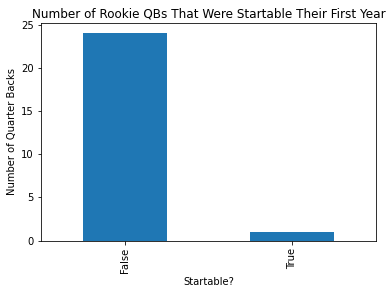

In [31]:
#Create a list of dictionaries with the same keyes for each dictionary
#Create a for loop that will go through each season, then go through  the name of every QB rookie in the dictionary
#Create a dataframe from the list of dictionaries that will show if QB is in the top ten


in_top_ten = []
for year in qb_rookie_dict.keys():
    top_ten = list(qb_rookie.loc[qb_rookie['Season']==year]['Player Name'].unique())
    for qb_rook in qb_rookie_dict[year]:
        
        temp = {}
        temp['Season'] = year
        temp['Player Name'] = qb_rook
        temp['Position'] = 'QB'
        temp['In Top 10'] = bool(qb_rook in top_ten)
        
        in_top_ten.append(temp)

qb_rook_results_df = pd.DataFrame(in_top_ten)#.to_csv("qb_rook_results.csv") # add data in to a csv file
qb_rook_results_group = qb_rook_results_df.groupby("In Top 10")
startable_count = qb_rook_results_group["In Top 10"].count()
startable_count.plot.bar(title="Number of Rookie QBs That Were Startable Their First Year",
                        xlabel= "Startable?", ylabel = "Number of Quarter Backs")


In [14]:
#sort dataset by top ten RB to see the players and  their points
rb_rookie = rb_data.sort_values(['Half PPR Points Season Total']).groupby(['Season']).tail(10)
rb_rookie.loc[rb_rookie['Season']==2019].sort_values(['Half PPR Points Season Total'], ascending=False)

,Player Name,Team,Position,Season,Games Played,Fumbles,Interceptions,Passing Yards,Passing TDs,Rushing Yards,Rushing TDs,Receptions,Receiving Yards,Receiving TDs,Half PPR Points Season Total
5532,Christian McCaffrey,CAR,RB,2019,16.0,0.0,0.0,0.0,0.0,1387.0,15.0,116.0,1005.0,4.0,411.2
5535,Aaron Jones,GNB,RB,2019,16.0,2.0,0.0,0.0,0.0,1084.0,16.0,49.0,474.0,3.0,290.3
5534,Derrick Henry,TEN,RB,2019,15.0,3.0,0.0,0.0,0.0,1540.0,16.0,18.0,206.0,2.0,285.6
5536,Ezekiel Elliott,DAL,RB,2019,16.0,2.0,0.0,0.0,0.0,1357.0,12.0,54.0,420.0,2.0,284.7
5537,Dalvin Cook,MIN,RB,2019,14.0,2.0,0.0,0.0,0.0,1135.0,13.0,53.0,519.0,0.0,265.9
5541,Austin Ekeler,LAC,RB,2019,16.0,2.0,0.0,0.0,0.0,557.0,3.0,92.0,993.0,8.0,263.0
5540,Nick Chubb,CLE,RB,2019,16.0,3.0,0.0,0.0,0.0,1494.0,8.0,36.0,278.0,0.0,237.2
5542,Mark Ingram,BAL,RB,2019,15.0,2.0,0.0,0.0,0.0,1018.0,10.0,26.0,247.0,5.0,225.5
5560,Leonard Fournette,JAX,RB,2019,15.0,1.0,0.0,0.0,0.0,1152.0,3.0,76.0,522.0,0.0,221.4
5552,Saquon Barkley,NYG,RB,2019,13.0,0.0,0.0,0.0,0.0,1003.0,6.0,52.0,438.0,2.0,218.1


In [15]:
#Create a dictionary that will be used to store all the RB rookie names and their respective seasons to go through a for loop
rb_rookie_dict = {
    2015: rb2015,
    2016: rb2016,
    2017: rb2017,
    2018: rb2018,
    2019: rb2019
}

<AxesSubplot:title={'center':'Number of Rookie RBs That Were Startable Their First Year'}, xlabel='Startable?', ylabel='Number of Running Backs'>

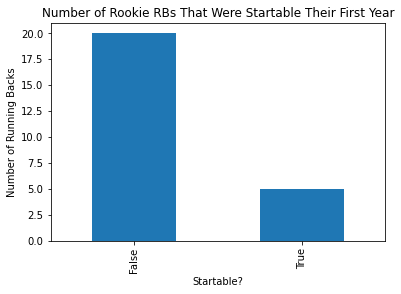

In [30]:
#Create a list of dictionaries with the same keyes for each dictionary
#Create a for loop that will go through each season, then go through  the name of every QB rookie in the dictionary
#Create a dataframe from the list of dictionaries that will show if QB is in the top ten


in_top_ten = []
for year in rb_rookie_dict.keys():
    top_ten = list(rb_rookie.loc[rb_rookie['Season']==year]['Player Name'].unique())
    for rb_rook in rb_rookie_dict[year]:
        
        temp = {}
        temp['Season'] = year
        temp['Player Name'] = rb_rook
        temp['Position'] = 'RB'
        temp['In Top 10'] = bool(rb_rook in top_ten)
        
        in_top_ten.append(temp)

rb_rook_results_df = pd.DataFrame(in_top_ten)#.to_csv("rb_rook_results.csv")
rb_rook_results_group = rb_rook_results_df.groupby("In Top 10")
startable_count = rb_rook_results_group["In Top 10"].count()
startable_count.plot.bar(title="Number of Rookie RBs That Were Startable Their First Year",
                        xlabel= "Startable?", ylabel = "Number of Running Backs")

In [17]:
#sort dataset by top ten WR to see the players and  their points
wr_rookie = wr_data.sort_values(['Half PPR Points Season Total']).groupby(['Season']).tail(10)
wr_rookie.loc[wr_rookie['Season']==2019].sort_values(['Half PPR Points Season Total'], ascending=False)

,Player Name,Team,Position,Season,Games Played,Fumbles,Interceptions,Passing Yards,Passing TDs,Rushing Yards,Rushing TDs,Receptions,Receiving Yards,Receiving TDs,Half PPR Points Season Total
5538,Michael Thomas,NOR,WR,2019,16.0,0.0,0.0,0.0,0.0,-9.0,0.0,149.0,1725.0,9.0,300.10
5546,Chris Godwin,TAM,WR,2019,14.0,0.0,0.0,0.0,0.0,8.0,0.0,86.0,1333.0,9.0,231.10
5558,Julio Jones,ATL,WR,2019,15.0,0.0,0.0,0.0,0.0,-3.0,0.0,99.0,1394.0,6.0,224.60
5557,Cooper Kupp,LAR,WR,2019,16.0,0.0,0.0,0.0,0.0,4.0,0.0,94.0,1161.0,10.0,223.50
5551,Kenny Golladay,DET,WR,2019,16.0,1.0,0.0,0.0,0.0,0.0,0.0,65.0,1190.0,11.0,215.50
5566,DeAndre Hopkins,HOU,WR,2019,15.0,0.0,1.0,6.0,1.0,18.0,0.0,104.0,1165.0,7.0,214.54
5559,DeVante Parker,MIA,WR,2019,16.0,0.0,0.0,0.0,0.0,0.0,0.0,72.0,1202.0,9.0,210.20
5568,Keenan Allen,LAC,WR,2019,16.0,0.0,0.0,0.0,0.0,16.0,0.0,104.0,1199.0,6.0,209.50
5563,Amari Cooper,DAL,WR,2019,16.0,0.0,0.0,0.0,0.0,6.0,0.0,79.0,1189.0,8.0,207.00
5570,Allen Robinson,CHI,WR,2019,16.0,0.0,0.0,0.0,0.0,2.0,0.0,98.0,1147.0,7.0,205.90


In [18]:
#Create a dictionary that will be used to store all the WR rookie names and their respective seasons to go through a for loop
wr_rookie_dict = {
    2015: rb2015,
    2016: rb2016,
    2017: rb2017,
    2018: rb2018,
    2019: rb2019
}

    Season          Player Name Position  In Top 10
0     2015          Todd Gurley       WR      False
1     2015        Melvin Gordon       WR      False
2     2015          T.J. Yeldon       WR      False
3     2015       Ameer Abdullah       WR      False
4     2015        Tevin Coleman       WR      False
5     2016      Ezekiel Elliott       WR      False
6     2016        Derrick Henry       WR      False
7     2016         Kenyan Drake       WR      False
8     2016         C.J. Prosise       WR      False
9     2016          Tyler Ervin       WR      False
10    2017    Leonard Fournette       WR      False
11    2017  Christian McCaffrey       WR      False
12    2017          Dalvin Cook       WR      False
13    2017            Joe Mixon       WR      False
14    2017         Alvin Kamara       WR      False
15    2018       Saquon Barkley       WR      False
16    2018        Rashaad Penny       WR      False
17    2018          Sony Michel       WR      False
18    2018  

<AxesSubplot:title={'center':'Number of Rookie WR That Were Startable Their First Year'}, xlabel='Startable?', ylabel='Number of Wide Receivers'>

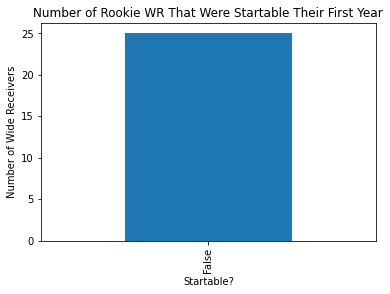

In [28]:
#Create a list of dictionaries with the same keyes for each dictionary
#Create a for loop that will go through each season, then go through  the name of every WR rookie in the dictionary
#Create a dataframe from the list of dictionaries that will show if QB is in the top ten


in_top_ten = []
for year in wr_rookie_dict.keys():
    top_ten = list(wr_rookie.loc[wr_rookie['Season']==year]['Player Name'].unique())
    for wr_rook in wr_rookie_dict[year]:
        
        temp = {}
        temp['Season'] = year
        temp['Player Name'] = wr_rook
        temp['Position'] = 'WR'
        temp['In Top 10'] = bool(wr_rook in top_ten)
        
        in_top_ten.append(temp)

wr_rook_results_df = pd.DataFrame(in_top_ten)#.to_csv("wr_rook_results.csv")
print(wr_rook_results_df)
wr_rook_results_group = wr_rook_results_df.groupby("In Top 10")
startable_count = wr_rook_results_group["In Top 10"].count()
startable_count.plot.bar(title="Number of Rookie WR That Were Startable Their First Year",
                        xlabel= "Startable?", ylabel = "Number of Wide Receivers")

In [ ]:
te_rookie = te_data.sort_values(['Half PPR Points Season Total']).groupby(['Season']).tail(10)
te_rookie.loc[te_rookie['Season']==2019].sort_values(['Half PPR Points Season Total'], ascending=False)

In [ ]:
#Create a dictionary that will be used to store all the WR rookie names and their respective seasons to go through a for loop
te_rookie_dict = {
    2015: te2015,
    2016: te2016,
    2017: te2017,
    2018: te2018,
    2019: te2019
}


In [ ]:
in_top_ten = []
for year in te_rookie_dict.keys():
    top_ten = list(te_rookie.loc[te_rookie['Season']==year]['Player Name'].unique())
    for te_rook in te_rookie_dict[year]:
        
        temp = {}
        temp['Season'] = year
        temp['Player Name'] = te_rook
        temp['Position'] = 'TE'
        temp['In Top 10'] = bool(te_rook in top_ten)
        
        in_top_ten.append(temp)

te_rook_results_df = pd.DataFrame(in_top_ten)
te_rook_results_df

In [23]:
te_rook_results_group = te_rook_results_df.groupby("In Top 10")
startable_count = te_rook_results_group["In Top 10"].count()
startable_count.plot.bar(title="Number of Rookie Tight Ends That Were Startable Their First Year",
                        xlabel= "Startable?", ylabel = "Number of Tight Ends")

NameError: name 'te_rook_results_df' is not defined

In [ ]:
#question 2 stuff below
temp_top_qbs = []
temp_top_rbs = []
temp_top_wrs = []
temp_top_tes = []

repeat_qbs = 0
repeat_rbs = 0
repeat_wrs = 0
repeat_tes = 0


years_duplicate = range(2010, 2019)

temp_positions = [temp_top_qbs, temp_top_rbs, temp_top_wrs, temp_top_tes]

for year in years_duplicate:

    temp_df = qb_data[qb_data['Season'] == year]
    temp_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    temp_df.reset_index(inplace = True, drop = True)
    next_year_df = qb_data[qb_data['Season'] == (year + 1)]
    next_year_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    next_year_df.reset_index(inplace = True, drop = True)
    next_year_df.drop(next_year_df.tail(-12).index,inplace=True)
    next_year_player = []
        
    for y in range(12):
        temp_top_qbs.append(temp_df._get_value(y, 'Player Name'))
        next_year_player.append(next_year_df._get_value(y, 'Player Name'))

            
        if temp_top_qbs[y] in next_year_player:
            repeat_qbs += 1

            
    temp_top_qbs = []

            
for year in years_duplicate:

    temp_df = rb_data[rb_data['Season'] == year]
    temp_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    temp_df.reset_index(inplace = True, drop = True)
    next_year_df = rb_data[rb_data['Season'] == (year + 1)]
    next_year_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    next_year_df.reset_index(inplace = True, drop = True)
    next_year_df.drop(next_year_df.tail(-24).index,inplace=True)
    next_year_player = []
        
    for y in range(24):
        temp_top_rbs.append(temp_df._get_value(y, 'Player Name'))
        next_year_player.append(next_year_df._get_value(y, 'Player Name'))

            
        if temp_top_rbs[y] in next_year_player:
            repeat_rbs += 1
           
    temp_top_rbs = []

    
for year in years_duplicate:

    temp_df = wr_data[wr_data['Season'] == year]
    temp_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    temp_df.reset_index(inplace = True, drop = True)
    next_year_df = wr_data[wr_data['Season'] == (year + 1)]
    next_year_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    next_year_df.reset_index(inplace = True, drop = True)
    next_year_df.drop(next_year_df.tail(-24).index,inplace=True)
    next_year_player = []
        
    for y in range(24):
        temp_top_wrs.append(temp_df._get_value(y, 'Player Name'))
        next_year_player.append(next_year_df._get_value(y, 'Player Name'))

            
        if temp_top_wrs[y] in next_year_player:
            repeat_wrs += 1
            

    temp_top_wrs = []

            

for year in years_duplicate:

    temp_df = te_data[te_data['Season'] == year]
    temp_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    temp_df.reset_index(inplace = True, drop = True)
    next_year_df = te_data[te_data['Season'] == (year + 1)]
    next_year_df.sort_values(by = 'Half PPR Points Season Total', inplace = True, ascending = False)
    next_year_df.reset_index(inplace = True, drop = True)
    next_year_df.drop(next_year_df.tail(-12).index,inplace=True)
    next_year_player = []
        
    for y in range(12):
        temp_top_tes.append(temp_df._get_value(y, 'Player Name'))
        next_year_player.append(next_year_df._get_value(y, 'Player Name'))

            
        if temp_top_tes[y] in next_year_player:
            repeat_tes += 1

            
    temp_top_tes = [] 

In [ ]:

repeat_qbs = round(repeat_qbs/9, 2)
repeat_rbs = round(repeat_rbs/9, 2)
repeat_wrs = round(repeat_wrs/9, 2)
repeat_tes = round(repeat_tes/9, 2)

rep_per_qb = repeat_qbs/12*100
rep_per_rb = repeat_rbs/24*100
rep_per_wr = repeat_wrs/24*100
rep_per_te = repeat_tes/12*100

In [ ]:
x_labels = ['QBs', 'RBs', 'WRs', 'TEs']
repeats = [rep_per_qb, rep_per_rb, rep_per_wr, rep_per_te]

In [ ]:

plt.bar(x_labels, repeats, color='r', alpha=.7, align="center")
plt.title('Likelyhood of Remaining Startable the Next Year by Position', fontsize = 15)
plt.ylabel('Percent (%)')
plt.xlabel('Position')
plt.ylim(0, 40)
plt.show()